In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [4]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('data/dataset_collaboration_with_survey_scores.csv')

df.head()

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,count,network_density,weighted_network_density,gini_coefficient,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
0,3_0_SPEAKER_00,3,1,0,22,8731,98,0.224490,0,0,0,0.583333,10.666667,0.402344,0.279554,2,1,1,0.000000,0.027778,0.013484,0.043980,-1.0,-1.0
1,3_0_SPEAKER_00,3,1,0,22,8731,98,0.224490,0,1,1,0.583333,10.666667,0.402344,0.279554,2,1,1,0.000000,0.027778,0.013484,0.043980,-1.0,-1.0
2,3_0_SPEAKER_00,3,1,0,22,8731,98,0.224490,0,2,0,0.583333,10.666667,0.402344,0.279554,2,1,1,0.000000,0.027778,0.013484,0.043980,-1.0,-1.0
3,3_0_SPEAKER_00,3,1,0,22,8731,98,0.224490,0,3,0,0.583333,10.666667,0.402344,0.279554,2,1,1,0.000000,0.027778,0.013484,0.043980,-1.0,-1.0
4,3_0_SPEAKER_01,3,1,1,645,8731,98,6.581633,1,0,1,0.583333,10.666667,0.402344,0.279554,87,43,44,0.666667,0.028302,0.632985,0.335446,-1.0,-1.0


전처리

In [7]:
df = df[(df['speaker_id'] != 5) & (df['next_speaker_id'] != 5) & (df['speaker_id'] != df['next_speaker_id'])]
df = df[df['project'] == 4]

df.head()

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,count,network_density,weighted_network_density,gini_coefficient,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
81,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,1,1,0.8,11.65,0.341631,0.330335,116,58,58,0.250000,0.125000,0.573573,0.237750,3.0,3.0
82,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,2,1,0.8,11.65,0.341631,0.330335,116,58,58,0.250000,0.125000,0.573573,0.237750,3.0,3.0
83,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,3,48,0.8,11.65,0.341631,0.330335,116,58,58,0.250000,0.125000,0.573573,0.237750,3.0,6.0
84,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,4,8,0.8,11.65,0.341631,0.330335,116,58,58,0.250000,0.125000,0.573573,0.237750,3.0,3.0
85,4_0_SPEAKER_01,4,1,1,711,12023,119,5.97479,1,0,3,0.8,11.65,0.341631,0.330335,42,21,21,0.083333,0.153846,0.214472,0.104646,2.0,3.0


In [8]:
df = df.drop(columns=['id', 'project', 'speaker_number'])

In [9]:
df.head()

,meeting_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,count,network_density,weighted_network_density,gini_coefficient,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
81,1,1294,12023,119,10.87395,0,1,1,0.8,11.65,0.341631,0.330335,116,58,58,0.250000,0.125000,0.573573,0.237750,3.0,3.0
82,1,1294,12023,119,10.87395,0,2,1,0.8,11.65,0.341631,0.330335,116,58,58,0.250000,0.125000,0.573573,0.237750,3.0,3.0
83,1,1294,12023,119,10.87395,0,3,48,0.8,11.65,0.341631,0.330335,116,58,58,0.250000,0.125000,0.573573,0.237750,3.0,6.0
84,1,1294,12023,119,10.87395,0,4,8,0.8,11.65,0.341631,0.330335,116,58,58,0.250000,0.125000,0.573573,0.237750,3.0,3.0
85,1,711,12023,119,5.97479,1,0,3,0.8,11.65,0.341631,0.330335,42,21,21,0.083333,0.153846,0.214472,0.104646,2.0,3.0


In [12]:
def set_meeting_type(meeting_number):
    if meeting_number in [8, 9, 11, 12]:
        return 'on'
    else:
        return 'off'

df['type'] = df['meeting_number'].apply(set_meeting_type)

df.tail()

,meeting_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,count,network_density,weighted_network_density,gini_coefficient,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score,type
377,12,10120,17930,162,62.469136,3,4,16,0.9,20.433333,0.429309,0.198417,487,243,244,0.000,0.064935,0.681256,0.367263,7.0,5.0,on
379,12,314,17930,162,1.938272,4,0,5,0.9,20.433333,0.429309,0.198417,52,26,26,0.375,0.156250,0.087136,0.060093,7.0,8.0,on
380,12,314,17930,162,1.938272,4,1,0,0.9,20.433333,0.429309,0.198417,52,26,26,0.375,0.156250,0.087136,0.060093,7.0,6.0,on
381,12,314,17930,162,1.938272,4,2,1,0.9,20.433333,0.429309,0.198417,52,26,26,0.375,0.156250,0.087136,0.060093,7.0,6.0,on
382,12,314,17930,162,1.938272,4,3,16,0.9,20.433333,0.429309,0.198417,52,26,26,0.375,0.156250,0.087136,0.060093,7.0,9.0,on


In [13]:
lbenc = LabelEncoder()
df['type'] = lbenc.fit_transform(df['type'])

df.tail()

,meeting_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,count,network_density,weighted_network_density,gini_coefficient,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score,type
377,12,10120,17930,162,62.469136,3,4,16,0.9,20.433333,0.429309,0.198417,487,243,244,0.000,0.064935,0.681256,0.367263,7.0,5.0,1
379,12,314,17930,162,1.938272,4,0,5,0.9,20.433333,0.429309,0.198417,52,26,26,0.375,0.156250,0.087136,0.060093,7.0,8.0,1
380,12,314,17930,162,1.938272,4,1,0,0.9,20.433333,0.429309,0.198417,52,26,26,0.375,0.156250,0.087136,0.060093,7.0,6.0,1
381,12,314,17930,162,1.938272,4,2,1,0.9,20.433333,0.429309,0.198417,52,26,26,0.375,0.156250,0.087136,0.060093,7.0,6.0,1
382,12,314,17930,162,1.938272,4,3,16,0.9,20.433333,0.429309,0.198417,52,26,26,0.375,0.156250,0.087136,0.060093,7.0,9.0,1


In [14]:
df.shape

(240, 22)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 81 to 382
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   meeting_number                  240 non-null    int64  
 1   speech_frequency                240 non-null    int64  
 2   total_words                     240 non-null    int64  
 3   duration                        240 non-null    int64  
 4   normalized_speech_frequency     240 non-null    float64
 5   speaker_id                      240 non-null    int64  
 6   next_speaker_id                 240 non-null    int64  
 7   count                           240 non-null    int64  
 8   network_density                 240 non-null    float64
 9   weighted_network_density        240 non-null    float64
 10  gini_coefficient                240 non-null    float64
 11  interaction_equality_index      240 non-null    float64
 12  degree_centrality               240 non-

상관관계

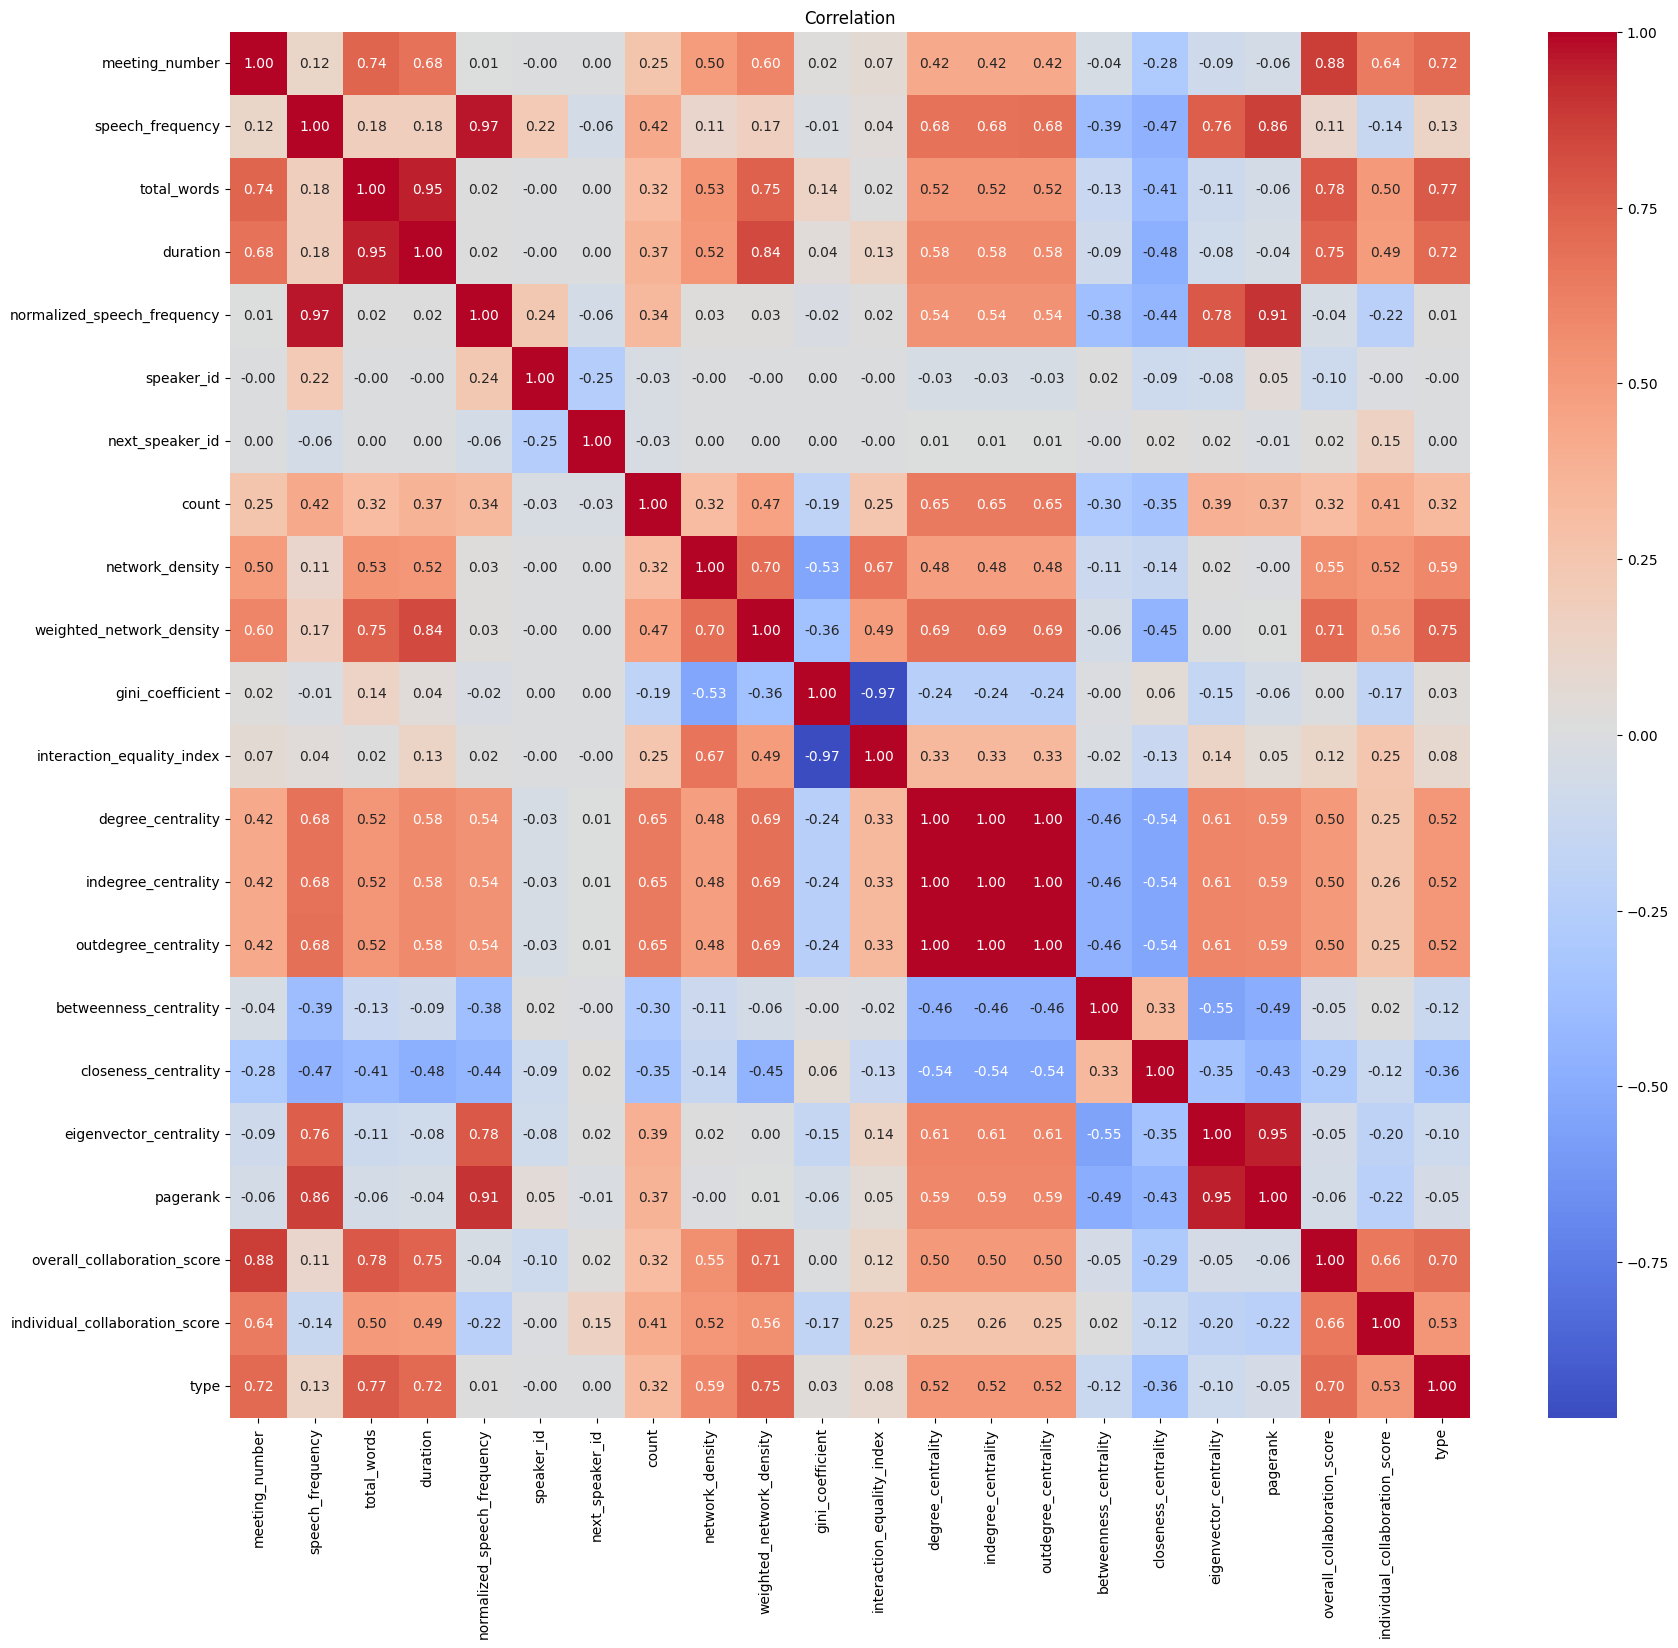

In [16]:
df_corr = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 18))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')
plt.show()

individual score

In [25]:
boost_models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'GradientBoost': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1)
}

In [27]:
kf_meeting = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = {model_name: [] for model_name in boost_models}
mae_scores = {model_name: [] for model_name in boost_models}
r2_scores = {model_name: [] for model_name in boost_models}
feature_importances = {model_name: [] for model_name in boost_models}

unique_meetings = df['meeting_number'].unique()

X = df.drop(['individual_collaboration_score'], axis=1)
y = df['individual_collaboration_score']

for train_index, test_index in kf_meeting.split(unique_meetings):
    train_meetings = unique_meetings[train_index]
    test_meetings = unique_meetings[test_index]

    X_train = df[df['meeting_number'].isin(train_meetings)].drop(['individual_collaboration_score'], axis=1)
    y_train = df[df['meeting_number'].isin(train_meetings)]['individual_collaboration_score']

    X_test = df[df['meeting_number'].isin(test_meetings)].drop(['individual_collaboration_score'], axis=1)
    y_test = df[df['meeting_number'].isin(test_meetings)]['individual_collaboration_score']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in boost_models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        mse_scores[model_name].append(mse)

        mae = mean_absolute_error(y_test, y_pred)
        mae_scores[model_name].append(mae)

        r2 = r2_score(y_test, y_pred)
        r2_scores[model_name].append(r2)

        if hasattr(model, 'feature_importances_'):
            feature_importances[model_name].append(model.feature_importances_)

for model_name in boost_models:
    print(f'[{model_name}] Mean Squared Errors in each fold: {mse_scores[model_name]}')
    print(f'[{model_name}] Average Mean Squared Error: {np.mean(mse_scores[model_name])}')
    print(f'[{model_name}] Mean Absolute Errors in each fold: {mae_scores[model_name]}')
    print(f'[{model_name}] Average Mean Absolute Error: {np.mean(mae_scores[model_name])}')
    print(f'[{model_name}] R-squared Scores in each fold: {r2_scores[model_name]}')
    print(f'[{model_name}] Average R-squared Score: {np.mean(r2_scores[model_name])}')
    print('------------------------------------------------------------------\n')

[RandomForestRegressor] Mean Squared Errors in each fold: [1.10616, 0.6730066666666666, 0.6440724999999999, 0.90009, 1.0728900000000001]
[RandomForestRegressor] Average Mean Squared Error: 0.8792438333333333
[RandomForestRegressor] Mean Absolute Errors in each fold: [0.8236666666666667, 0.6426666666666667, 0.60175, 0.744, 0.8955]
[RandomForestRegressor] Average Mean Absolute Error: 0.7415166666666668
[RandomForestRegressor] R-squared Scores in each fold: [0.7544897657213316, 0.7610391557352797, 0.7881340460526316, 0.5074746922024624, 0.6481606886657102]
[RandomForestRegressor] Average R-squared Score: 0.6918596696754831
------------------------------------------------------------------

[XGBoost] Mean Squared Errors in each fold: [0.9137899297634874, 0.6700198669228133, 0.9966385524116674, 0.7667843756242292, 1.1608567268715801]
[XGBoost] Average Mean Squared Error: 0.9016178903187555
[XGBoost] Mean Absolute Errors in each fold: [0.7580411116282145, 0.6310830632845561, 0.73626097440719

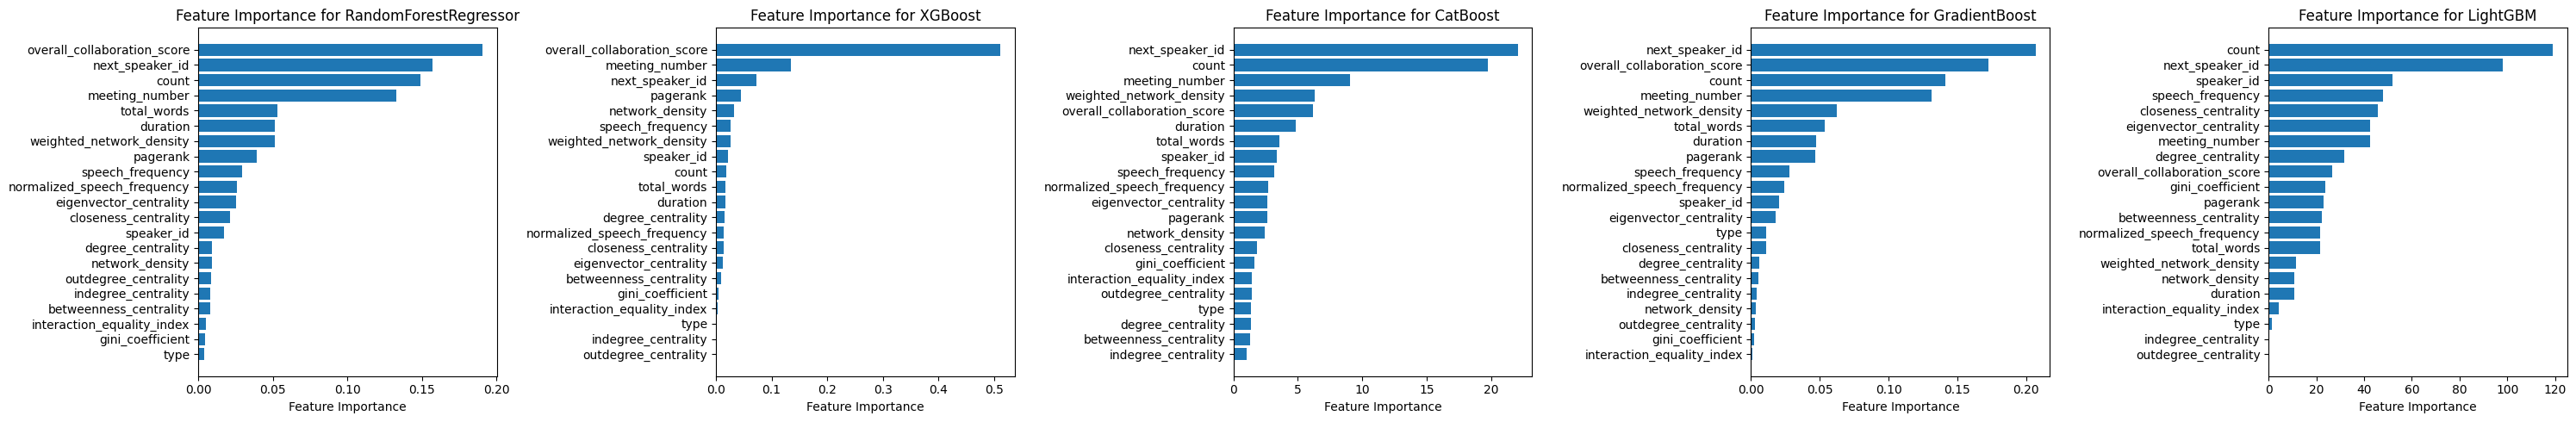

In [31]:
num_models = len(boost_models)
fig, axes = plt.subplots(1, num_models, figsize=(30, 5), sharey=False)

for i, (model_name, importance_list) in enumerate(feature_importances.items()):
    if importance_list:
        avg_importance = np.mean(importance_list, axis=0)
        sorted_indices = np.argsort(avg_importance)[::-1]
        sorted_importance = avg_importance[sorted_indices]
        sorted_features = X.columns[sorted_indices]

        ax = axes[i]
        ax.barh(sorted_features, sorted_importance)
        ax.set_xlabel('Feature Importance')
        ax.set_title(f'Feature Importance for {model_name}')
        ax.invert_yaxis()

plt.tight_layout()
plt.show()

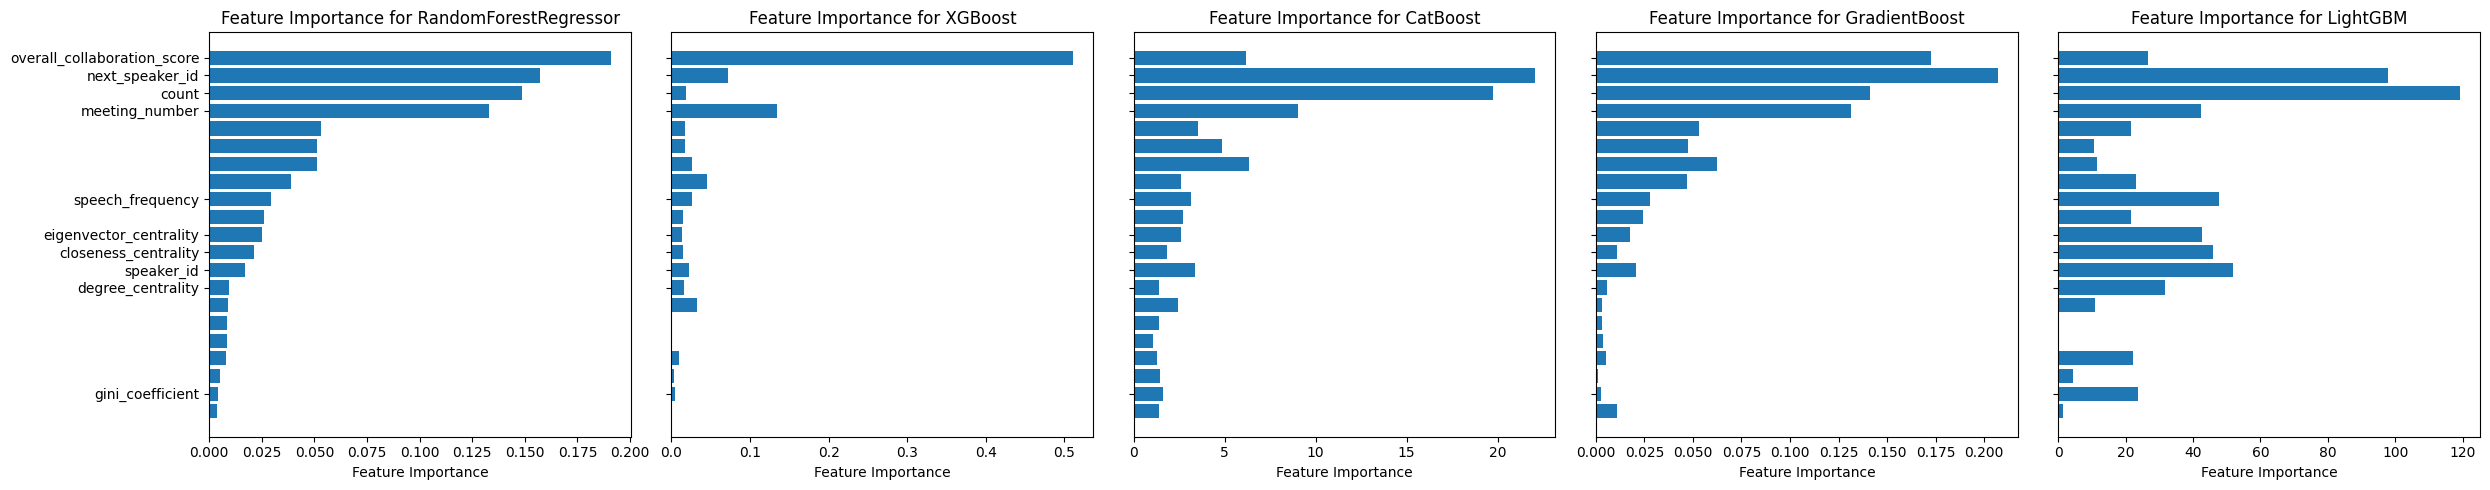

In [33]:
num_models = len(boost_models)
top_features_per_model = {model_name: [] for model_name in boost_models}

# 각 모델에서의 피쳐 중요도 평균값 계산
all_feature_importances = []
for model_name, importance_list in feature_importances.items():
    if importance_list:
        avg_importance = np.mean(importance_list, axis=0)
        all_feature_importances.append(avg_importance)

        # 상위권 피쳐 설정 (10개)
        sorted_indices = np.argsort(avg_importance)[::-1]
        top_features_indices = sorted_indices[:10]
        top_features = X.columns[top_features_indices].tolist()

        top_features_per_model[model_name] = top_features

fig, axes = plt.subplots(1, num_models, figsize=(5*num_models, 5), sharey=True)

for i, (model_name, top_features) in enumerate(top_features_per_model.items()):
    ax = axes[i]
    importance_list = feature_importances[model_name]

    if importance_list:
        avg_importance = np.mean(importance_list, axis=0)
        sorted_indices = np.argsort(avg_importance)[::-1]
        sorted_importance = avg_importance[sorted_indices]
        sorted_features = X.columns[sorted_indices]

        ax.barh(sorted_features, sorted_importance)
        ax.set_xlabel('Feature Importance')
        ax.set_title(f'Feature Importance for {model_name}')
        ax.invert_yaxis()

        # 상위 피쳐들만 표시
        ax.set_yticks(sorted_features[:10])
        ax.set_yticklabels(sorted_features[:10])

plt.tight_layout()
plt.show()

feature 선택

- feature - count, meeting_number, next_speaker_id(중요), overall_collaboration_score, speech_frequency, eigenvector_centrality, speaker_id
- catboost

In [38]:
kf_meeting = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = {model_name: [] for model_name in boost_models}
mae_scores = {model_name: [] for model_name in boost_models}
r2_scores = {model_name: [] for model_name in boost_models}
feature_importances = {model_name: [] for model_name in boost_models}

unique_meetings = df['meeting_number'].unique()

X = df[['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
y = df['individual_collaboration_score']

for train_index, test_index in kf_meeting.split(unique_meetings):
    train_meetings = unique_meetings[train_index]
    test_meetings = unique_meetings[test_index]

    X_train = df[df['meeting_number'].isin(train_meetings)][['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
    y_train = df[df['meeting_number'].isin(train_meetings)]['individual_collaboration_score']

    X_test = df[df['meeting_number'].isin(test_meetings)][['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
    y_test = df[df['meeting_number'].isin(test_meetings)]['individual_collaboration_score']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in boost_models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        mse_scores[model_name].append(mse)

        mae = mean_absolute_error(y_test, y_pred)
        mae_scores[model_name].append(mae)

        r2 = r2_score(y_test, y_pred)
        r2_scores[model_name].append(r2)

        if hasattr(model, 'feature_importances_'):
            feature_importances[model_name].append(model.feature_importances_)

for model_name in boost_models:
    print(f'[{model_name}] Mean Squared Errors in each fold: {mse_scores[model_name]}')
    print(f'[{model_name}] Average Mean Squared Error: {np.mean(mse_scores[model_name])}')
    print(f'[{model_name}] Mean Absolute Errors in each fold: {mae_scores[model_name]}')
    print(f'[{model_name}] Average Mean Absolute Error: {np.mean(mae_scores[model_name])}')
    print(f'[{model_name}] R-squared Scores in each fold: {r2_scores[model_name]}')
    print(f'[{model_name}] Average R-squared Score: {np.mean(r2_scores[model_name])}')
    print('------------------------------------------------------------------\n')

[RandomForestRegressor] Mean Squared Errors in each fold: [1.1983683333333335, 0.6747216666666667, 0.86982, 0.8826274999999999, 1.5612325]
[RandomForestRegressor] Average Mean Squared Error: 1.037354
[RandomForestRegressor] Mean Absolute Errors in each fold: [0.8558333333333332, 0.6535, 0.6859999999999999, 0.74125, 1.06175]
[RandomForestRegressor] Average Mean Absolute Error: 0.7996666666666666
[RandomForestRegressor] R-squared Scores in each fold: [0.7340242909987669, 0.7604302199427952, 0.713875, 0.517030095759234, 0.4880155769624923]
[RandomForestRegressor] Average R-squared Score: 0.6426750367326577
------------------------------------------------------------------

[XGBoost] Mean Squared Errors in each fold: [0.9088582980710063, 0.7102847328934057, 1.0906044210665187, 0.7914323890656959, 1.008655396300965]
[XGBoost] Average Mean Squared Error: 0.9019670474795184
[XGBoost] Mean Absolute Errors in each fold: [0.7299157698949178, 0.6824819207191467, 0.7698751568794251, 0.699356412887

Hyper Prameter

- CatBoost
- XGBoost

In [41]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_child_weight': [1, 2, 3]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_cb = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10],
    'num_leaves': [31, 50, 100]
}

In [44]:
param_grids = {
    'RandomForestRegressor': param_grid_rf,
    'XGBoost': param_grid_xgb,
    'GradientBoost': param_grid_gb,
    'CatBoost': param_grid_cb,
    'LightGBM': param_grid_lgbm
}

In [45]:
# Initialize dictionaries to store scores and feature importances
mse_scores = {model_name: [] for model_name in boost_models}
mae_scores = {model_name: [] for model_name in boost_models}
r2_scores = {model_name: [] for model_name in boost_models}
feature_importances = {model_name: [] for model_name in boost_models}

# Assume df is your DataFrame containing necessary columns
unique_meetings = df['meeting_number'].unique()

# Features and target
X = df[['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
y = df['individual_collaboration_score']

# Initialize KFold with 5 splits, shuffling, and fixed random state
kf_meeting = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with grid search
for train_index, test_index in kf_meeting.split(unique_meetings):
    train_meetings = unique_meetings[train_index]
    test_meetings = unique_meetings[test_index]

    X_train = df[df['meeting_number'].isin(train_meetings)][['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
    y_train = df[df['meeting_number'].isin(train_meetings)]['individual_collaboration_score']

    X_test = df[df['meeting_number'].isin(test_meetings)][['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
    y_test = df[df['meeting_number'].isin(test_meetings)]['individual_collaboration_score']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model using GridSearchCV
    for model_name, model in boost_models.items():
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

        # Fit grid search
        grid_search.fit(X_train_scaled, y_train)

        # Get best model and predict
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Append scores to dictionaries
        mse_scores[model_name].append(mse)
        mae_scores[model_name].append(mae)
        r2_scores[model_name].append(r2)

        # Check if the model has feature importances attribute
        if hasattr(best_model, 'feature_importances_'):
            feature_importances[model_name].append(best_model.feature_importances_)

# Print results
for model_name in boost_models:
    print(f'[{model_name}] Mean Squared Errors in each fold: {mse_scores[model_name]}')
    print(f'[{model_name}] Average Mean Squared Error: {np.mean(mse_scores[model_name])}')
    print(f'[{model_name}] Mean Absolute Errors in each fold: {mae_scores[model_name]}')
    print(f'[{model_name}] Average Mean Absolute Error: {np.mean(mae_scores[model_name])}')
    print(f'[{model_name}] R-squared Scores in each fold: {r2_scores[model_name]}')
    print(f'[{model_name}] Average R-squared Score: {np.mean(r2_scores[model_name])}')
    print('------------------------------------------------------------------\n')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 

결과 df 확인

In [50]:
mse_scores = {model_name: [] for model_name in boost_models}
mae_scores = {model_name: [] for model_name in boost_models}
r2_scores = {model_name: [] for model_name in boost_models}
feature_importances = {model_name: [] for model_name in boost_models}
predicted_scores = []

# Features and target
X = df[['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
y = df['individual_collaboration_score']

# Initialize KFold with 5 splits, shuffling, and fixed random state
kf_meeting = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with grid search
for train_index, test_index in kf_meeting.split(df['meeting_number'].unique()):
    train_meetings = df['meeting_number'].unique()[train_index]
    test_meetings = df['meeting_number'].unique()[test_index]

    X_train = df[df['meeting_number'].isin(train_meetings)][['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
    y_train = df[df['meeting_number'].isin(train_meetings)]['individual_collaboration_score']

    X_test = df[df['meeting_number'].isin(test_meetings)][['count', 'meeting_number', 'next_speaker_id', 'speaker_id', 'overall_collaboration_score', 'speech_frequency', 'eigenvector_centrality']]
    y_test = df[df['meeting_number'].isin(test_meetings)]['individual_collaboration_score']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model using GridSearchCV
    for model_name, model in boost_models.items():
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=0)

        # Fit grid search
        grid_search.fit(X_train_scaled, y_train)

        # Get best model and predict
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Append scores to dictionaries
        mse_scores[model_name].append(mse)
        mae_scores[model_name].append(mae)
        r2_scores[model_name].append(r2)

        # Check if the model has feature importances attribute
        if hasattr(best_model, 'feature_importances_'):
            feature_importances[model_name].append(best_model.feature_importances_)

        # Combine predicted scores with original data
        df_predictions = pd.DataFrame({
            'speaker_id': X_test['speaker_id'],
            'next_speaker_id': X_test['next_speaker_id'],
            'meeting_number': X_test['meeting_number'],
            'predicted_individual_collaboration_score': y_pred
        })
        predicted_scores.append(df_predictions)

# Concatenate all predicted scores dataframes
df_predicted_scores = pd.concat(predicted_scores, ignore_index=True)

# Calculate average individual_collaboration_score for each next_speaker_id per meeting
average_original_scores = df.groupby(['meeting_number', 'next_speaker_id'])['individual_collaboration_score'].mean().reset_index()
average_predicted_scores = df_predicted_scores.groupby(['meeting_number', 'next_speaker_id'])['predicted_individual_collaboration_score'].mean().reset_index()

# Merge both average scores dataframes
result_df = pd.merge(average_original_scores, average_predicted_scores, on=['meeting_number', 'next_speaker_id'], suffixes=('_original', '_predicted'))

In [53]:
result_df   # 개별 평가 점수 평균값

,meeting_number,next_speaker_id,individual_collaboration_score,predicted_individual_collaboration_score
0,1,0,3.50,3.613139
1,1,1,2.75,3.099056
2,1,2,2.50,3.191093
3,1,3,5.75,5.970239
4,1,4,2.50,3.665721
5,2,0,4.50,3.563311
6,2,1,3.50,3.366809
7,2,2,3.00,3.142428
8,2,3,6.00,5.803511
9,2,4,3.25,3.361797
